In [3]:
# default_exp algo.ml.unsupervised.abnormal_detection

%reload_ext autoreload
%autoreload 2

# algo-ml-unsupervised-abnormal_detection

# Python Outlier Detection (PyOD)
https://github.com/yzhao062/pyod  
doc https://pyod.readthedocs.io/en/latest/  

pyod异常检查的一个开源工具包
## installation
pip install -U pyod

In [15]:
#!pip install -U pyod
!pip freeze | grep pyod

pyod==0.7.4
pyodbc==4.0.26


## API

* `fit(X)`: Fit detector.
* `decision_function(X)`: Predict raw anomaly score of X using the fitted detector.
* `predict(X)`: Predict if a particular sample is an outlier or not using the fitted detector.
* `predict_proba(X)`: Predict the probability of a sample being outlier using the fitted detector.
* `fit_predict(X)`: [Deprecated in V0.6.9] Fit detector first and then predict whether a particular sample is an outlier or not.
* `fit_predict_score(X, y)`: [Deprecated in V0.6.9] Fit the detector, predict on samples, and evaluate the model by predefined metrics, e.g., ROC.
### Key Attributes of a fitted model:

* `decision_scores_`: The outlier scores of the training data. The higher, the more abnormal. Outliers tend to have higher scores.
* `labels_`: The binary labels of the training data. 0 stands for inliers and 1 for outliers/anomalies.

__Note__ : `fit_predict()` and `fit_predict_score()` are deprecated in V0.6.9 due to consistency issue and will be removed in V0.8.0. To get the binary labels of the training data X_train, one should call clf.fit(X_train) and use clf.labels_, instead of calling clf.predict(X_train).

## Implemented Algorithms
PyOD toolkit consists of three major functional groups:

### (i) Individual Detection Algorithms :

#### Linear Model

PCA  
MCD  
OCSVM

#### Proximity-Based

LOF  
COF  
LOCI  
HBOS  
KNN  
AvgKNN  
MedKNN  
SOD  

#### Probabilistic

ABOD  
FastABOD  
SOS  


#### Outlier Ensembles
IForest  
LSCP  
XGBOD  

#### Neural Networks
AutoEncoder  
SO_GAAL  
MO_GAAL

### (ii) Outlier Ensembles & Outlier Detector Combination Frameworks:

Average	Simple combination by averaging the scores  
Weighted Average	Simple combination by averaging the scores with detector weights  
Maximization	Simple combination by taking the maximum scores  
AOM	Average of Maximum  
MOA	Maximization of Average

### (iii) Utility Functions:

Type	Name	Function	Documentation  
Data	generate_data	Synthesized data generation; normal data is generated by a multivariate Gaussian and outliers are generated by a uniform distribution  
Data	generate_data_clusters	Synthesized data generation in clusters; more complex data patterns can be created with multiple clusters	generate_data_clusters
Stat	wpearsonr	Calculate the weighted Pearson correlation of two samples  
Utility	get_label_n	Turn raw outlier scores into binary labels by assign 1 to top n outlier scores  
Utility	precision_n_scores	calculate precision @ rank n  

# examples

## benchmark
https://github.com/yzhao062/pyod/blob/master/notebooks/benchmark.py

## knn_example(有监督)
图中绿色圆要被分类到哪一类(蓝色方形？红色三角?)

取离绿色圆最近的K个样本，哪类样本所占的比例多，就分到哪一类。

当K=3的时候，红色三角形所占比例为2/3，绿色圆将被分类到红色三角形类。

当K=5的时候，蓝色方形所占比例为3/5，绿色圆将被分类到蓝色方形类。

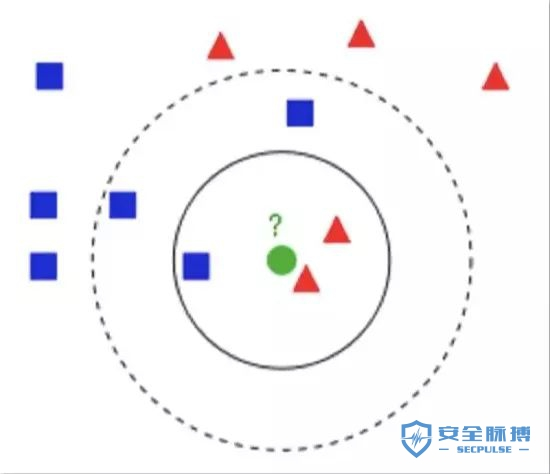

In [1]:
from pyod.models.knn import KNN
from pyod.utils.data import generate_data
from pyod.utils.data import evaluate_print
from pyod.utils.example import visualize

In [6]:
import matplotlib.pyplot as plt
# 支持中文显示
plt.rcParams['font.sans-serif'] = ['STFangsong']
plt.rcParams['axes.unicode_minus'] = False

### Generate sample data

In [2]:
contamination = 0.1  # percentage of outliers
n_train = 200  # number of training points
n_test = 100  # number of testing points

# Generate sample data
X_train, y_train, X_test, y_test = \
    generate_data(n_train=n_train,
                  n_test=n_test,
                  n_features=2,
                  contamination=contamination,
                  random_state=14)

In [4]:
X_train[:5]

array([[8.13468655, 7.94399956],
       [6.44831823, 8.11200451],
       [6.83784772, 8.16343356],
       [7.56785715, 8.8396045 ],
       [7.85578147, 8.01135032]])

In [5]:
y_train[:5]

array([0., 0., 0., 0., 0.])

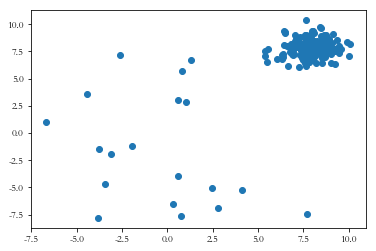

In [8]:
plt.scatter(X_train[:, 0], X_train[:, 1])

### train kNN detector

In [9]:
# train kNN detector
clf_name = 'KNN'
clf = KNN()
clf.fit(X_train)

KNN(algorithm='auto', contamination=0.1, leaf_size=30, method='largest',
  metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=5, p=2,
  radius=1.0)

In [10]:
# get the prediction labels and outlier scores of the training data
y_train_pred = clf.labels_  # binary labels (0: inliers, 1: outliers)
y_train_scores = clf.decision_scores_  # raw outlier scores

# get the prediction on the test data
y_test_pred = clf.predict(X_test)  # outlier labels (0 or 1)
y_test_scores = clf.decision_function(X_test)  # outlier scores

# evaluate and print the results
print("\nOn Training Data:")
evaluate_print(clf_name, y_train, y_train_scores)
print("\nOn Test Data:")
evaluate_print(clf_name, y_test, y_test_scores)


On Training Data:
KNN ROC:0.9986, precision @ rank n:0.95

On Test Data:
KNN ROC:1.0, precision @ rank n:1.0


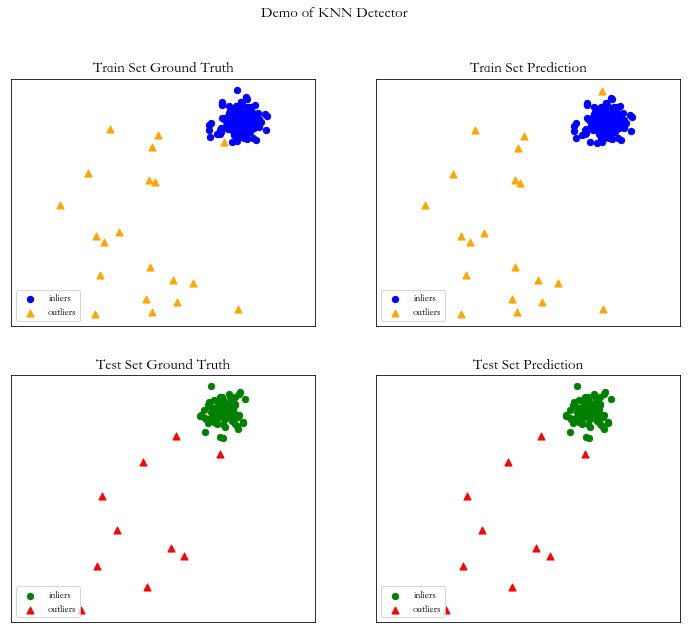

In [11]:
# visualize the results
visualize(clf_name, X_train, y_train, X_test, y_test, y_train_pred,
          y_test_pred, show_figure=True, save_figure=True)

## iforest_example

In [12]:
from pyod.models.iforest import IForest
from pyod.utils.data import generate_data

from pyod.utils.data import evaluate_print
from pyod.utils.example import visualize

/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:223: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)



On Training Data:
IForest ROC:0.9944, precision @ rank n:0.9

On Test Data:
IForest ROC:0.9989, precision @ rank n:0.9


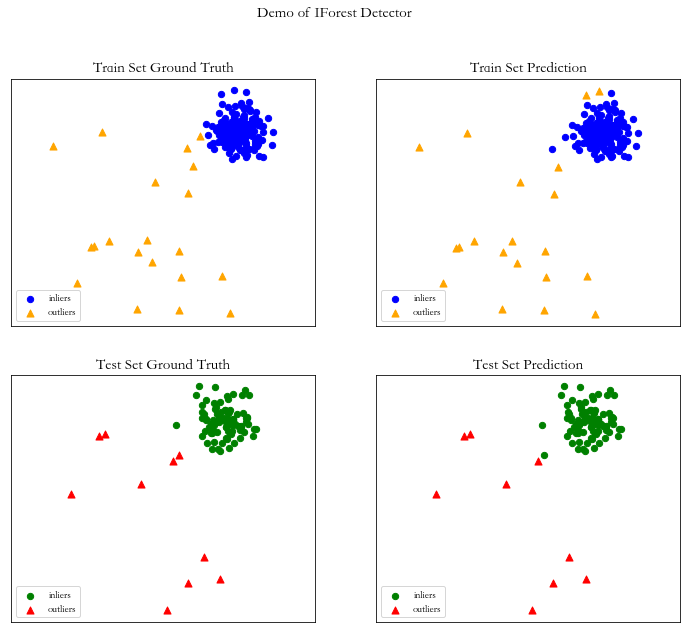

In [13]:
contamination = 0.1  # percentage of outliers
n_train = 200  # number of training points
n_test = 100  # number of testing points

# Generate sample data
X_train, y_train, X_test, y_test = \
    generate_data(n_train=n_train,
                  n_test=n_test,
                  n_features=2,
                  contamination=contamination,
                  random_state=42)

# train IForest detector
clf_name = 'IForest'
clf = IForest()
clf.fit(X_train)

# get the prediction labels and outlier scores of the training data
y_train_pred = clf.labels_  # binary labels (0: inliers, 1: outliers)
y_train_scores = clf.decision_scores_  # raw outlier scores

# get the prediction on the test data
y_test_pred = clf.predict(X_test)  # outlier labels (0 or 1)
y_test_scores = clf.decision_function(X_test)  # outlier scores

# evaluate and print the results
print("\nOn Training Data:")
evaluate_print(clf_name, y_train, y_train_scores)
print("\nOn Test Data:")
evaluate_print(clf_name, y_test, y_test_scores)

# visualize the results
visualize(clf_name, X_train, y_train, X_test, y_test, y_train_pred,
          y_test_pred, show_figure=True, save_figure=False)

## auto_encoder_example

In [34]:
!pip freeze | grep Keras

Keras==2.2.4
Keras-Applications==1.0.7
Keras-Preprocessing==1.0.9


In [36]:
!pip freeze | grep tensorflow

tensorflow==1.14.0
tensorflow-estimator==1.14.0


In [35]:
!pip freeze | grep pyod

pyod==0.7.4
pyodbc==4.0.26


In [31]:
from pyod.models.auto_encoder import AutoEncoder
from pyod.utils.data import generate_data
from pyod.utils.data import evaluate_print

In [3]:
contamination = 0.1  # percentage of outliers
n_train = 20000  # number of training points
n_test = 2000  # number of testing points
n_features = 300  # number of features

# Generate sample data
X_train, y_train, X_test, y_test = \
    generate_data(n_train=n_train,
                  n_test=n_test,
                  n_features=n_features,
                  contamination=contamination,
                  random_state=42)

/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/pyod/utils/data.py:190: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.8.0. Please use behaviour="new", which makes the returned datasets in the order of X_train, X_test, y_train, y_test.
  FutureWarning)


In [4]:
# train AutoEncoder detector
clf_name = 'AutoEncoder'
clf = AutoEncoder(epochs=30, contamination=contamination)
clf.fit(X_train)

W0813 15:46:39.791227 140735529624448 deprecation_wrapper.py:119] From /Users/luoyonggui/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0813 15:46:39.811166 140735529624448 deprecation_wrapper.py:119] From /Users/luoyonggui/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0813 15:46:39.815474 140735529624448 deprecation_wrapper.py:119] From /Users/luoyonggui/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0813 15:46:39.838287 140735529624448 deprecation_wrapper.py:119] From /Users/luoyonggui/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 300)               90300     
_________________________________________________________________
dropout_1 (Dropout)          (None, 300)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 300)               90300     
_________________________________________________________________
dropout_2 (Dropout)          (None, 300)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                19264     
_________________________________________________________________
dropout_3 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 32)                2080      
__________

W0813 15:46:40.529532 140735529624448 deprecation_wrapper.py:119] From /Users/luoyonggui/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 18000 samples, validate on 2000 samples
Epoch 1/30
18000/18000 [==============================] - 3s 156us/step - loss: 97.7132 - val_loss: 20.7556
Epoch 2/30
18000/18000 [==============================] - 2s 104us/step - loss: 12.1207 - val_loss: 8.0869
Epoch 3/30
18000/18000 [==============================] - 2s 101us/step - loss: 6.2613 - val_loss: 5.4155
Epoch 4/30
18000/18000 [==============================] - 2s 119us/step - loss: 4.6271 - val_loss: 4.2649
Epoch 5/30
18000/18000 [==============================] - 2s 108us/step - loss: 3.8002 - val_loss: 3.5776
Epoch 6/30
18000/18000 [==============================] - 2s 98us/step - loss: 3.2664 - val_loss: 3.1159
Epoch 7/30
18000/18000 [==============================] - 2s 108us/step - loss: 2.8735 - val_loss: 2.7880
Epoch 8/30
18000/18000 [==============================] - 2s 110us/step - loss: 2.5761 - val_loss: 2.5068
Epoch 9/30
18000/18000 [==============================] - 2s 104us/step - loss: 2.3314 - val_loss: 2.

AutoEncoder(batch_size=32, contamination=0.1, dropout_rate=0.2, epochs=30,
      hidden_activation='relu', hidden_neurons=[64, 32, 32, 64],
      l2_regularizer=0.1,
      loss=<function mean_squared_error at 0x12c657f28>, optimizer='adam',
      output_activation='sigmoid', preprocessing=True, random_state=None,
      validation_size=0.1, verbose=1)

In [6]:
# get the prediction labels and outlier scores of the training data
y_train_pred = clf.labels_  # binary labels (0: inliers, 1: outliers)
y_train_scores = clf.decision_scores_  # raw outlier scores

In [7]:
# get the prediction on the test data
y_test_pred = clf.predict(X_test)  # outlier labels (0 or 1)
y_test_scores = clf.decision_function(X_test)  # outlier scores

In [8]:
# evaluate and print the results
print("\nOn Training Data:")
evaluate_print(clf_name, y_train, y_train_scores)
print("\nOn Test Data:")
evaluate_print(clf_name, y_test, y_test_scores)


On Training Data:
AutoEncoder ROC:1.0, precision @ rank n:1.0

On Test Data:
AutoEncoder ROC:1.0, precision @ rank n:1.0


In [12]:
from sklearn.metrics import classification_report

In [14]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1800
         1.0       1.00      1.00      1.00       200

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



In [11]:
y_test_pred

array([0, 0, 0, ..., 1, 1, 1])

In [9]:
y_test_scores

array([ 7.89626583,  7.47674153,  7.69570731, ..., 49.42823708,
       50.04617787, 47.32094283])

## Quick Start for Combining Outlier Scores from Various Base Detectors
Outlier detection often suffers from model instability due to its unsupervised nature. Thus, it is recommended to combine various detector outputs, e.g., by averaging, to improve its robustness. Detector combination is a subfield of outlier ensembles; refer [3] for more information.

### Four score combination mechanisms are shown in this demo:

* Average: average scores of all detectors.
* maximization: maximum score across all detectors.
* Average of Maximum (AOM): divide base detectors into subgroups and take the maximum score for each subgroup. The final score is the average of all subgroup scores.
* Maximum of Average (MOA): divide base detectors into subgroups and take the average score for each subgroup. The final score is the maximum of all subgroup scores.

### 步骤
1. First initialize 20 kNN outlier detectors with different k (10 to 200), and get the outlier scores.

1. Then the output scores are standardized into zero mean and unit variance before combination. This step is crucial to adjust the detector outputs to the same scale.

1. Then four different combination algorithms are applied as described above.

1. Finally, all four combination methods are evaluated with ROC and Precision @ Rank n.

In [30]:
import os
import sys

# temporary solution for relative imports in case pyod is not installed
# if pyod is installed, no need to use the following line
sys.path.append(
    os.path.abspath(os.path.join(os.path.dirname("__file__"), '..')))

import numpy as np
from sklearn.model_selection import train_test_split
from scipy.io import loadmat

from pyod.models.knn import KNN
from pyod.models.combination import aom, moa, average, maximization
from pyod.utils.utility import standardizer
from pyod.utils.data import generate_data
from pyod.utils.data import evaluate_print

if __name__ == "__main__":

    # Define data file and read X and y
    # Generate some data if the source data is missing
    mat_file = 'cardio.mat'
    try:
        mat = loadmat(os.path.join('data', mat_file))

    except TypeError:
        print('{data_file} does not exist. Use generated data'.format(
            data_file=mat_file))
        X, y = generate_data(train_only=True)  # load data
    except IOError:
        print('{data_file} does not exist. Use generated data'.format(
            data_file=mat_file))
        X, y = generate_data(train_only=True)  # load data
    else:
        X = mat['X']
        y = mat['y'].ravel()

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

    # standardizing data for processing
    X_train_norm, X_test_norm = standardizer(X_train, X_test)

    n_clf = 20  # number of base detectors

    # Initialize 20 base detectors for combination
    k_list = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140,
              150, 160, 170, 180, 190, 200]

    train_scores = np.zeros([X_train.shape[0], n_clf])
    test_scores = np.zeros([X_test.shape[0], n_clf])

    print('Combining {n_clf} kNN detectors'.format(n_clf=n_clf))

    for i in range(n_clf):
        k = k_list[i]

        clf = KNN(n_neighbors=k, method='largest')
        clf.fit(X_train_norm)

        train_scores[:, i] = clf.decision_scores_
        test_scores[:, i] = clf.decision_function(X_test_norm)

    # Decision scores have to be normalized before combination
    train_scores_norm, test_scores_norm = standardizer(train_scores,
                                                       test_scores)
    # Combination by average
    y_by_average = average(test_scores_norm)
    evaluate_print('Combination by Average', y_test, y_by_average)

    # Combination by max
    y_by_maximization = maximization(test_scores_norm)
    evaluate_print('Combination by Maximization', y_test, y_by_maximization)

    # Combination by aom
    y_by_aom = aom(test_scores_norm, n_buckets=5)
    evaluate_print('Combination by AOM', y_test, y_by_aom)

    # Combination by moa
    y_by_moa = moa(test_scores_norm, n_buckets=5)
    evaluate_print('Combination by MOA', y_test, y_by_moa)

Combining 20 kNN detectors
Combination by Average ROC:0.9236, precision @ rank n:0.5526
Combination by Maximization ROC:0.9215, precision @ rank n:0.5921
Combination by AOM ROC:0.9268, precision @ rank n:0.5921
Combination by MOA ROC:0.9289, precision @ rank n:0.6053


# 多元高斯
## 假设样本独立

## 假设样本不独立

In [1]:
#!/usr/bin/python
# encoding: utf-8

"""
@author: Ian
@contact:yongguiluo@hotmail.com
@file: abnormal_detection_gaussian.py
@time: 2019/4/14 10:29
"""
import pandas as pd
import numpy as np
import math
from sklearn.metrics import classification_report, roc_auc_score, f1_score
from sklearn.model_selection import KFold, train_test_split


def prob(x):
    """
    x是行向量
    :param x:
    :return:
    """
    p = 1 / ((2 * math.pi) ** (train_set.shape[1] * 0.5) * np.linalg.det(sigma) ** 0.5) \
        * math.exp(-0.5 * (x - mu).dot(np.linalg.inv(sigma)).dot((x - mu).T))
    return p


if __name__ == "__main__":
    mode = 3
    df = pd.read_csv('../../tmp/creditcard.csv')
    """
    对于严重倾斜的样本，如何划分训练集、验证集、测试集？
    https://www.bilibili.com/video/av9912938/?p=92
    1、先把正常positive样本和异常negtive样本区分开来
    2、然后把正常样本分成5份
        拿出3份作为train_set
        拿出1份+异常样本作为cv_set
        拿出1份+异常样本作为test_set
        
    如何评定最优？https://www.bilibili.com/video/av9912938/?p=92
        f1值最大
        AUC最大？？？ 不合适，应该是理解没有到位
        AUPRC (area under the precision-recall curve) as an evaluation metric
            AUPRC has advantages over AUC when the class distribution is highly skewed（倾斜. 
            The trapezoidal method can be used to approximate the area under the curve.
    """
    # 获取正常样本和异常样本
    positive_set = df[df['Class'] == 0].values[:, 1:-1]
    negtive_set = df[df['Class'] == 1].values[:, 1:-1]
    data_set, test_set = train_test_split(positive_set, test_size=0.2, random_state=14)
    kf = KFold(n_splits=4, shuffle=True, random_state=14)
    if mode == 3:
        """
        利用多元高斯分布求解异常监测2 假设特征间相关
        这是更常见的一种情况！！！
        https://www.bilibili.com/video/av9912938/?p=95
        
        步骤：
        1、参数估计
            mu：n维向量，n为特征数
            sigma：协方差矩阵。n * n维矩阵
        2、求出联合概率分布
        3、确定最优阈值
        """
        #3，利用网格法，确定最优阈值epsilon
        epsilons = [3.1598899884113835e-23, 3.1598899884113835e-22, 3.1598899884113835e-21]
        """
        [0.19844890510948907, 0.1996328591096833, 0.19402319357716324, 0.1963882618510158] 0.19712330491183785
        [0.172800629797284, 0.17192089289210888, 0.1681992337164751, 0.17018802093428959] 0.1707771943350394
        [0.14621237181607677, 0.14525139664804468, 0.1431340872374798, 0.1439036301481361] 0.14462537146243434
        """
        epsilons = [1.1598899884113835e-25, 1.1598899884113835e-27, 1.1598899884113835e-29]
        """
        [0.2525073746312685, 0.2519823788546256, 0.2476905311778291, 0.2502187226596675] 0.2505997518308477
        [0.29037742264535876, 0.29018008834522596, 0.28409846972721225, 0.28619302949061665] 0.2877122525521034
                     precision    recall  f1-score   support
        
                  0       1.00      0.97      0.98     56863
                  1       0.19      0.84      0.31       492
        
        avg / total       0.99      0.97      0.98     57355
        [0.31051253273475493, 0.31439393939393934, 0.3074648928307465, 0.3083209509658246] 0.31017307898131635        
        """
        epsilons = [1.1598899884113835e-31, 1.1598899884113835e-34, 1.1598899884113835e-37]
        """
        [0.3387755102040816, 0.3412828947368421, 0.3323988786543852, 0.3384991843393148] 0.33773911698365594
        [0.36868008948545866, 0.37780834479596515, 0.3624396665204037, 0.3691756272401434] 0.3695259320104927
                     precision    recall  f1-score   support
        
                  0       1.00      0.98      0.99     56863
                  1       0.26      0.84      0.40       492
        
        avg / total       0.99      0.98      0.98     57355
        
        [0.4005847953216374, 0.40997506234413966, 0.39217557251908397, 0.3957631198844487] 0.39962463751732746        
        """
        epsilons = [1.1598899884113835e-40, 1.1598899884113835e-44, 1.1598899884113835e-48]
        """
        [0.4328593996840442, 0.4356120826709062, 0.418960244648318, 0.42524573202276256] 0.42816936475650774
        [0.46249294980259453, 0.47289504036908886, 0.4566666666666667, 0.4610207515423443] 0.4632688520951736
                     precision    recall  f1-score   support
        
                  0       1.00      0.99      0.99     56863
                  1       0.34      0.83      0.48       492
        
        avg / total       0.99      0.98      0.99     57355
        [0.4845238095238096, 0.49333333333333323, 0.48366013071895425, 0.480565371024735] 0.48552066115020803        
        """
        epsilons = [1.1598899884113835e-52, 1.1598899884113835e-56, 1.1598899884113835e-60]
        """
        [0.512950094756791, 0.5155555555555555, 0.5062344139650873, 0.5043478260869565] 0.5097719725910976
        [0.5388188453881885, 0.5453324378777703, 0.529335071707953, 0.5296803652968037] 0.5357916800676789
                     precision    recall  f1-score   support
        
                  0       1.00      0.99      0.99     56863
                  1       0.41      0.81      0.55       492
        
        avg / total       0.99      0.99      0.99     57355
        [0.5606166783461808, 0.5645730416372619, 0.5468215994531784, 0.5460750853242321] 0.5545216011902133
        """
        epsilons = [1.1598899884113835e-62, 1.1598899884113835e-66, 1.1598899884113835e-70]
        """
        [0.5706134094151212, 0.5749279538904899, 0.5563282336578582, 0.5544005544005544] 0.5640675378410058
        [0.5855457227138643, 0.5908750934928946, 0.577259475218659, 0.5679542203147354] 0.5804086279350382
                     precision    recall  f1-score   support
        
                  0       1.00      0.99      1.00     56863
                  1       0.46      0.80      0.59       492
        
        avg / total       0.99      0.99      0.99     57355
        [0.6039755351681957, 0.6113266097750194, 0.6016755521706018, 0.5892857142857143] 0.6015658528498828        
        """
        epsilons = [1.1598899884113835e-80, 1.1598899884113835e-85, 1.1598899884113835e-90]
        """
        [0.6431501230516817, 0.6538461538461539, 0.629718875502008, 0.627294493216281] 0.6385024114040312
        [0.6621621621621622, 0.6689595872742906, 0.640329218106996, 0.6457990115321252] 0.6543124947688935
                     precision    recall  f1-score   support
                  0       1.00      0.99      1.00     56863
                  1       0.57      0.79      0.66       492
        avg / total       0.99      0.99      0.99     57355
        [0.6712683347713546, 0.6843501326259946, 0.6609880749574106, 0.6621507197290433] 0.6696893155209507
        """
        epsilons = [1.1598899884113835e-100, 1.1598899884113835e-110, 1.1598899884113835e-120]
        """
        [0.6912691269126913, 0.6977168949771689, 0.6826241134751773, 0.6825817860300619] 0.6885479803487748
        [0.7180451127819547, 0.7149576669802445, 0.6978021978021978, 0.7079482439926064] 0.7096883053892509
                     precision    recall  f1-score   support
                  0       1.00      1.00      1.00     56863
                  1       0.67      0.77      0.72       492
        avg / total       1.00      0.99      0.99     57355
        [0.7312859884836852, 0.709551656920078, 0.7091254752851711, 0.7175141242937851] 0.7168693112456799
        """
        epsilons = [1.1598899884113835e-125, 1.1598899884113835e-130, 1.1598899884113835e-135]
        """
        [0.7256809338521402, 0.7091633466135459, 0.7080504364694471, 0.7239732569245464] 0.7167169934649199
        [0.7192118226600985, 0.7141424272818456, 0.7147087857847976, 0.7165048543689322] 0.7161419725239184
                     precision    recall  f1-score   support
                  0       1.00      1.00      1.00     56863
                  1       0.69      0.74      0.71       492
        avg / total       1.00      0.99      1.00     57355
        [0.724172517552658, 0.72210953346856, 0.7141424272818456, 0.7144259077526987] 0.7187125965139406
        """
        for epsilon in epsilons:
            f1_list = []
            for train_index, test_index in kf.split(data_set):
                # print("TRAIN:", train_index, "TEST:", test_index)
                train_set, cv_set = data_set[train_index], data_set[test_index]
                #1、参数估计
                mu = np.mean(train_set, axis=0)
                sigma = (train_set - mu).T.dot((train_set - mu))/train_set.shape[0]
                #2、求出联合概率分布

                pp_list, pf_list = [], []
                for x in range(cv_set.shape[0]):
                    pp_list.append(prob(cv_set[x]))
                print('正常样本的p值范围：{}-{}'.format(min(pp_list), max(pp_list)))  #
                for x in range(negtive_set.shape[0]):
                    pf_list.append(prob(negtive_set[x]))
                print('异常样本的p值范围：{}-{}'.format(min(pf_list), max(pf_list)))  #
                predictions = []
                for p in (pp_list+pf_list):
                    if p < epsilon:
                        predictions.append(1)
                    else:
                        predictions.append(0)
                print(classification_report([0]*cv_set.shape[0]+[1]*negtive_set.shape[0], predictions))
                f1 = f1_score([0]*cv_set.shape[0]+[1]*negtive_set.shape[0], predictions)
                f1_list.append(f1)
            print(f1_list, np.mean(f1_list))

    if mode == 2:
        """
        利用多元高斯分布求解异常监测1 假设特征间彼此独立
        https://www.bilibili.com/video/av9912938/?p=91
        
        步骤：
        1，参数估计：利用正常样本求出每个特征的均值ui和方差sigmai**2
        2，由特征间独立假设，得到联合概率密度分布，即每个特征分布的乘积
        3，利用网格法，确定最优阈值epsilon
            
        """
        for train_index, test_index in kf.split(data_set):
            # print("TRAIN:", train_index, "TEST:", test_index)
            train_set, cv_set = data_set[train_index], data_set[test_index]
            # 求每个特征的均值ui和方差sigmai**2
            ui_list, sigmai_list = [], []
            for i in range(train_set.shape[1]):
                ui_list.append(np.mean(train_set[:, i]))
                sigmai_list.append(np.std(train_set[:, i]))
            # 联合概率密度函数
            def prob(x):
                p = 1
                for i in range(train_set.shape[1]):
                    p = p * 1/(math.sqrt(2 * math.pi) * sigmai_list[i]) * math.exp(-(x[i]-ui_list[i])**2/(2*sigmai_list[i]**2))
                return p
            pp_list, pf_list = [], []
            for i in range(train_set.shape[0]):
                p = prob(train_set[i])
                pp_list.append(p)
            print('正常样本的p值范围：{}-{}'.format(min(pp_list), max(pp_list)))#0.0-3.8534293655740184e-14
            for i in range(test_set.shape[0]):
                p = prob(test_set[i])
                pf_list.append(p)
            print('异常样本的p值范围：{}-{}'.format(min(pf_list), max(pf_list)))#0.0-2.352825898167053e-15
            # picklew.dump2File(pp_list, 'pp_list.pkl')
            # picklew.dump2File(pf_list, 'pf_list.pkl')
            # pp_list = picklew.loadFromFile('pp_list.pkl')
            # pf_list = picklew.loadFromFile('pf_list.pkl')
            #网格法确定最优epsilon（即f1值最大的epsilon）
            def grid(epsilons):
                for epsilon in epsilons:
                    pps = pd.Series(pp_list)
                    pps[pps >= epsilon] = 1
                    pps[pps < epsilon] = 0
                    r0 = pps.value_counts()
                    # print(r0)
                    pfs = pd.Series(pf_list)
                    pfs[pfs >= epsilon] = 1
                    pfs[pfs < epsilon] = 0
                    r1 = pfs.value_counts()
                    # print(r1)
                    #计算异常样本的召回率、准确率、f1score
                    recall = r1[0]/(r1[0]+r1[1])
                    precision = r1[0]/(r1[0]+r0[0])
                    f1 = 2/(1/recall+1/precision)
                    print('准确率：{:.2%}--召回率：{:.2%}--f1：{:.2%}'.format(precision, recall, f1))
                    print(roc_auc_score(pd.Series([1]*284315+[0]*492), pps.append(pfs)))
                    # print(classification_report(pd.Series([1]*284315+[0]*492), pps.append(pfs)))
            # epsilons = [2.352825898167053e-15, 1e-15, 5e-16]
            """
            准确率：0.20%--召回率：99.80%--f1：0.41%
            准确率：0.22%--召回率：99.19%--f1：0.45%
            准确率：0.24%--召回率：98.98%--f1：0.48%      
            """
            epsilons = [1e-103, 1e-105, 1e-107]
            """
            准确率：15.44%--召回率：41.06%--f1：22.44%
            0.7033395270818508
            准确率：15.93%--召回率：40.85%--f1：22.92%
            0.702402404495529
            准确率：15.91%--召回率：39.63%--f1：22.70%  
            0.6963576019041058    
            
            最终 epsilon大约在1e-105附近取到最优解，f1：22.92%
            """
            grid(epsilons)
    if mode == 1:
        """
        data_explore
        """
        print(df.shape)#(284807, 31)
        # print(df['Class'].value_counts())
        """
        0    284315
        1       492
        """
        # print('ratio:{:.2f}'.format(284315/492))#ratio:577.88

# sklearn.neighbors.LocalOutlierFactor
https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.LocalOutlierFactor.html

Unsupervised Outlier Detection using Local Outlier Factor (LOF)

The anomaly score of each sample is called Local Outlier Factor. 

It measures the local deviation(偏离) of density of a given sample with respect to its neighbors. It is local in that the anomaly score depends on how isolated the object is with respect to the surrounding neighborhood. 

More precisely, locality is given by k-nearest neighbors, whose distance is used to estimate the local density. By comparing the local density of a sample to the local densities of its neighbors, one can identify samples that have a substantially lower density than their neighbors. These are considered outliers.



In [1]:
from sklearn.neighbors import LocalOutlierFactor

In [ ]:
LocalOutlierFactor(
    n_neighbors=20,
    *,
    algorithm='auto',
    leaf_size=30,
    metric='minkowski',
    p=2,
    metric_params=None,
    contamination='auto', # 'auto' or float, default='auto'
                        # The amount of contamination of the data set, i.e. the proportion
                        # of outliers in the data set. When fitting this is used to define the
                        # threshold on the scores of the samples.
                        # - if 'auto', the threshold is determined as in the
                          # original paper,
                        # - if a float, the contamination should be in the range [0, 0.5].

                        # .. versionchanged:: 0.22
                           # The default value of ``contamination`` changed from 0.1
                           # to ``'auto'``.
    novelty=False,
    n_jobs=None,
)

In [2]:
from sklearn.datasets import load_iris
print("Iris: multiclass classification")
iris = load_iris()
y = iris['target']
X = iris['data']

Iris: multiclass classification


In [3]:
outlier_scores = LocalOutlierFactor(contamination=0.2).fit_predict(X)

In [4]:
outlier_scores

array([ 1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1, -1, -1, -1, -1,
        1, -1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1,
        1,  1,  1,  1, -1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1, -1,
        1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1, -1, -1, -1,  1, -1,  1,  1,  1,  1,  1,  1,  1, -1, -1,
        1,  1,  1, -1,  1,  1, -1,  1,  1,  1, -1, -1, -1,  1,  1,  1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [8]:
X[outlier_scores==-1]

array([[5.4, 3.9, 1.7, 0.4],
       [4.4, 2.9, 1.4, 0.2],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.7, 3.8, 1.7, 0.3],
       [4.6, 3.6, 1. , 0.2],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.4, 3. , 1.3, 0.2],
       [4.5, 2.3, 1.3, 0.3],
       [5.1, 3.8, 1.9, 0.4],
       [7. , 3.2, 4.7, 1.4],
       [4.9, 2.4, 3.3, 1. ],
       [5. , 2. , 3.5, 1. ],
       [5. , 2.3, 3.3, 1. ],
       [5.1, 2.5, 3. , 1.1],
       [7.6, 3. , 6.6, 2.1],
       [4.9, 2.5, 4.5, 1.7],
       [7.3, 2.9, 6.3, 1.8],
       [7.2, 3.6, 6.1, 2.5],
       [7.7, 3.8, 6.7, 2.2],
       [7.7, 2.6, 6.9, 2.3],
       [7.7, 2.8, 6.7, 2. ],
       [7.2, 3.2, 6. , 1.8],
       [7.2, 3. , 5.8, 1.6],
       [7.4, 2.8, 6.1, 1.9],
       [7.9, 3.8, 6.4, 2. ],
       [7.7, 3. , 6.1, 2.3]])

# IForest
## 思路
https://www.jianshu.com/p/5af3c66e0410?utm_campaign=maleskine

首先，我们先了解下该算法的动机。目前学术界对异常（anomaly detection）的定义有很多种，iForest 适用与连续数据（Continuous numerical data）的异常检测，将异常定义为“容易被孤立的离群点 (more likely to be separated)”——可以理解为分布稀疏且离密度高的群体较远的点。用统计学来解释，在数据空间里面，分布稀疏的区域表示数据发生在此区域的概率很低，因而可以认为落在这些区域里的数据是异常的。

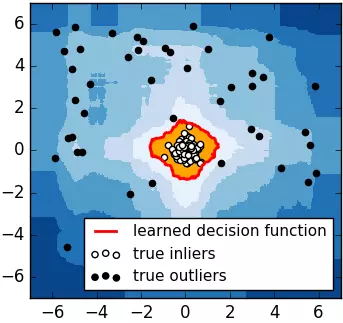

黑色的点为异常点，白色点为正常的点（在一个簇中）。iForest检测到的异常边界为红色，它可以正确地检测到所有黑点异常点。

### iForest属于Non-parametric和unsupervised的方法，
即不用定义数学模型也不需要有标记的训练。

对于如何查找哪些点是否容易被孤立（isolated），iForest使用了一套非常高效的策略。

假设我们用一个随机超平面来切割（split）数据空间（data space）, 切一次可以生成两个子空间（想象拿刀切蛋糕一分为二）。之后我们再继续用一个随机超平面来切割每个子空间，循环下去，直到每子空间里面只有一个数据点为止。直观上来讲，我们可以发现那些密度很高的簇是可以被切很多次才会停止切割，但是那些密度很低的点很容易很早的就停到一个子空间了。

上图里面黑色的点就很容易被切几次就停到一个子空间，而白色点聚集的地方可以切很多次才停止。

### 怎么来切这个数据空间是iForest的设计核心思想，

本文仅介绍最基本的方法。由于切割是随机的，所以需要用ensemble的方法来得到一个收敛值（蒙特卡洛方法），即反复从头开始切，然后平均每次切的结果。

iForest 由t个iTree（Isolation Tree）孤立树 组成，每个iTree是一个二叉树结构，其实现步骤如下：
1. 从训练数据中随机选择Ψ个点样本点作为subsample，放入树的根节点。
2. 随机指定一个维度（attribute），在当前节点数据中随机产生一个切割点p——切割点产生于当前节点数据中指定维度的最大值和最小值之间。
3. 以此切割点生成了一个超平面，然后将当前节点数据空间划分为2个子空间：把指定维度里小于p的数据放在当前节点的左孩子，把大于等于p的数据放在当前节点的右孩子。
4. 在孩子节点中递归步骤2和3，不断构造新的孩子节点，直到 孩子节点中只有一个数据（无法再继续切割） 或 孩子节点已到达限定高度 。

获得t个iTree之后，iForest 训练就结束，然后我们可以用生成的iForest来评估测试数据了。对于一个训练数据x，我们令其遍历每一棵iTree，然后计算x最终落在每个树第几层（x在树的高度）。然后我们可以得出x在每棵树的高度平均值，即 the average path length over t iTrees。值得注意的是，如果x落在一个节点中含多个训练数据，可以使用一个公式来修正x的高度计算，详细公式推导见原论文。

获得每个测试数据的average path length后，我们可以设置一个阈值（边界值），average path length 低于此阈值的测试数据即为异常。也就是说 “iForest identifies anomalies as instances having the shortest average path lengths in a dataset ”(异常在这些树中只有很短的平均高度). *值得注意的是，论文中对树的高度做了归一化，并得出一个0到1的数值，即越短的高度越接近1（异常的可能性越高）。4个测试样本遍历一棵iTree的例子如下：

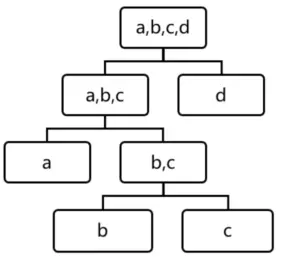

可以看到d最有可能是异常，因为其最早就被孤立（isolated）了。

# sklearn IsolationForest
https://scikit-learn.org/stable/auto_examples/ensemble/plot_isolation_forest.html#sphx-glr-auto-examples-ensemble-plot-isolation-forest-py

实现code：https://github.com/scikit-learn/scikit-learn/blob/1495f6924/sklearn/ensemble/iforest.py#L29

`sklearn.ensemble.IsolationForest(n_estimators=100, max_samples=’auto’, contamination=’legacy’, max_features=1.0, bootstrap=False, n_jobs=None, behaviour=’old’, random_state=None, verbose=0, warm_start=False)`

* n_estimators : int, optional (default=100)
The number of base estimators in the ensemble.

* max_samples : int or float, optional (default=”auto”)
The number of samples to draw from X to train each base estimator.

    * If int, then draw max_samples samples.
    * If float, then draw max_samples * X.shape[0] samples.
    * If “auto”, then max_samples=min(256, n_samples).
    * If max_samples is larger than the number of samples provided, all samples will be used for all trees (no sampling).

* contamination : float in (0., 0.5), optional (default=0.1)
The amount of contamination of the data set, i.e. the proportion of outliers in the data set. Used when fitting to define the threshold on the decision function. If ‘auto’, the decision function threshold is determined as in the original paper.

* max_features : int or float, optional (default=1.0)
The number of features to draw from X to train each base estimator.

    * If int, then draw max_features features.
    * If float, then draw max_features * X.shape[1] features.

* n_jobs : int or None, optional (default=None)
The number of jobs to run in parallel for both fit and predict. None means 1 unless in a joblib.parallel_backend context. -1 means using all processors. 

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

## Generate train data

In [2]:
rng = np.random.RandomState(42)

# Generate train data
X = 0.3 * rng.randn(100, 2)
X_train = np.r_[X + 2, X - 2]
# Generate some regular novel observations
X = 0.3 * rng.randn(20, 2)
X_test = np.r_[X + 2, X - 2]
# Generate some abnormal novel observations
X_outliers = rng.uniform(low=-4, high=4, size=(20, 2))

## fit the model

In [20]:
clf = IsolationForest(behaviour='new', max_samples=100,
                      random_state=rng, contamination='auto')
clf.fit(X_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
y_pred_outliers = clf.predict(X_outliers)

NameError: name 'rng' is not defined

In [4]:
y_pred_test

array([ 1, -1,  1,  1, -1, -1,  1,  1,  1,  1, -1, -1,  1,  1,  1,  1,  1,
       -1, -1,  1,  1, -1, -1,  1, -1,  1,  1,  1,  1,  1, -1, -1,  1,  1,
        1,  1,  1, -1, -1,  1])

In [5]:
y_pred_outliers

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1])

## plot the line, the samples, and the nearest vectors to the plane

In [9]:
xx, yy = np.meshgrid(np.linspace(-5, 5, 50), np.linspace(-5, 5, 50))

In [14]:
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
Z[:5]

array([[-0.13413756, -0.13413756, -0.13413756, -0.13413756, -0.13413756,
        -0.13413756, -0.13413756, -0.13413756, -0.13413756, -0.13413756,
        -0.13413756, -0.12853627, -0.12025778, -0.08773074, -0.04964979,
        -0.03409079, -0.0570899 , -0.09870029, -0.1135743 , -0.11205086,
        -0.11477633, -0.11383374, -0.11271196, -0.11159222, -0.11167049,
        -0.11167049, -0.1091414 , -0.11515325, -0.11566321, -0.11217757,
        -0.11167049, -0.10954162, -0.09296122, -0.08250661, -0.07796984,
        -0.08161331, -0.10183266, -0.11929298, -0.11980638, -0.11980638,
        -0.11980638, -0.11980638, -0.11980638, -0.11980638, -0.11980638,
        -0.11980638, -0.11980638, -0.11980638, -0.11980638, -0.11980638],
       [-0.13413756, -0.13413756, -0.13413756, -0.13413756, -0.13413756,
        -0.13413756, -0.13413756, -0.13413756, -0.13413756, -0.13413756,
        -0.13413756, -0.12853627, -0.12025778, -0.08773074, -0.04964979,
        -0.03409079, -0.0570899 , -0.09870029, -0.

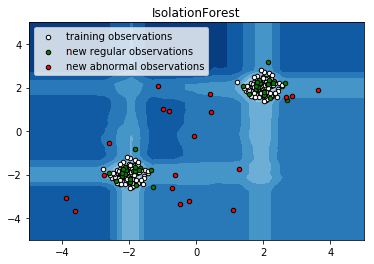

In [7]:
plt.title("IsolationForest")
plt.contourf(xx, yy, Z, cmap=plt.cm.Blues_r)

b1 = plt.scatter(X_train[:, 0], X_train[:, 1], c='white',
                 s=20, edgecolor='k')
b2 = plt.scatter(X_test[:, 0], X_test[:, 1], c='green',
                 s=20, edgecolor='k')
c = plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c='red',
                s=20, edgecolor='k')
plt.axis('tight')
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.legend([b1, b2, c],
           ["training observations",
            "new regular observations", "new abnormal observations"],
           loc="upper left")
plt.show()

# Extended Isolation Forest-IForest的改进版
https://towardsdatascience.com/outlier-detection-with-extended-isolation-forest-1e248a3fe97b

孤立森林算法利用了异常观测很少并且与“正常”观测显着不同的事实。 森林建立在决策树的基础上，每棵树都可以访问训练数据的子样本。 为了在树中创建分支，首先，选择随机特征。 然后，为该特征选择随机分割值（在最小值和最大值之间）。 如果给定的观察具有该特征的较低值，则选择它的一个遵循左分支，否则是右分支。 继续该过程直到单个点被隔离或达到指定的最大深度。

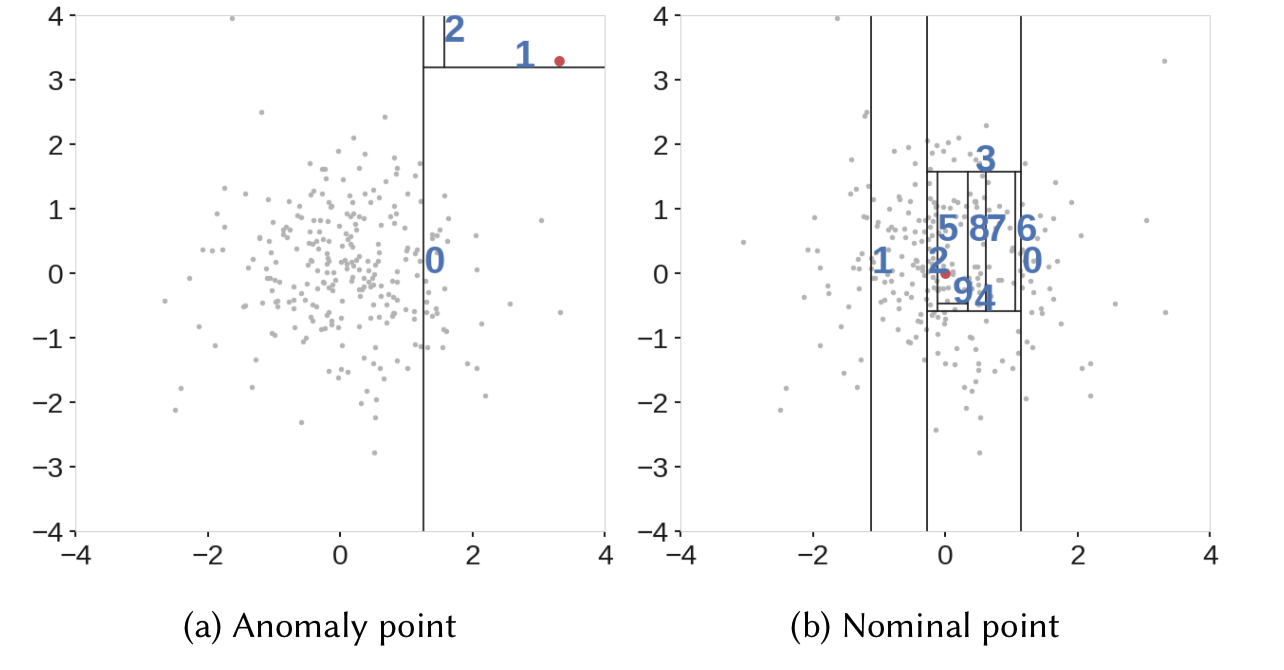

原则上，异常值不如常规观测值频繁，并且在值方面与它们不同（它们远离特征空间中的常规观测值）。 这就是为什么通过使用这样的随机分区，它们应该更接近树的根（较短的平均路径长度，即观察必须在树中从根到终端节点传递的边数），更少 必要的分裂。

异常分数是根据森林中的所有树木以及这些树木中的点到达的深度创建的。

## Isolation Forest’s Problem

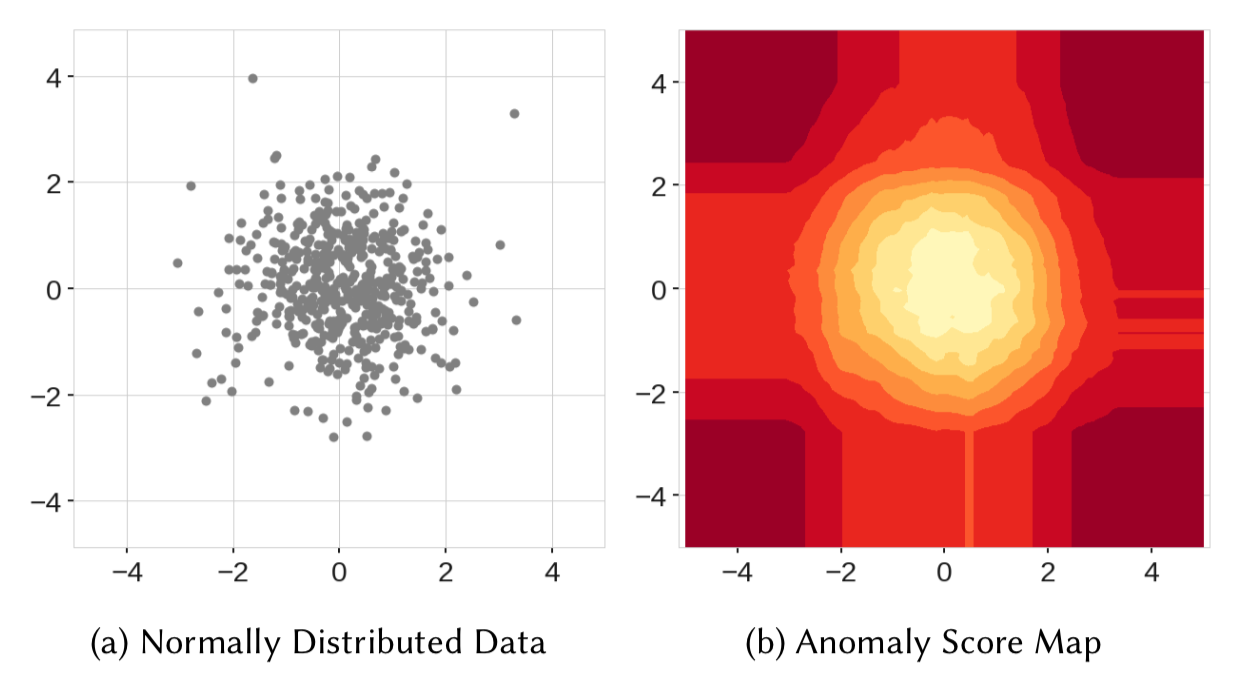

在左图中，我们可以看到从多元正态分布中采样的数据。 直观地，我们假设分配给观测值的异常分数将从分布[0,0]的中心点径向增加。 但是，显然不是这种情况，如右图所示。 What is more, there are also rectangular artifacts of a lower score, such as the vertical one between point 0 and 1 on the x-axis.

让我们继续第二个例子。 在这里，我们看到两个以点[0,10]和[10,0]为中心的斑点。By inspecting the right figure we see not only the artifacts that were present before, but also two ghost clusters (approximately at [0, 0] and [10, 10]).

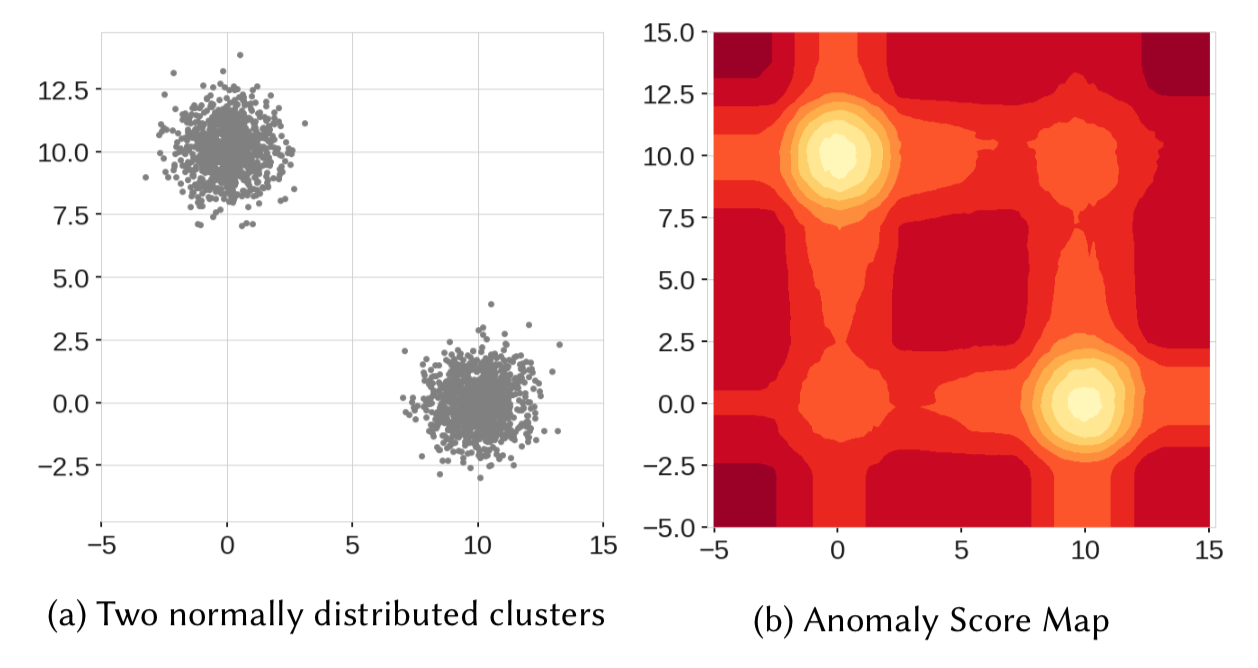

The reason for this peculiar behavior originates from the fact that the decision boundaries of the Isolation Forest are either vertical or horizontal (random value of a random feature), as seen in the picture below, where the authors plot branch cuts generated by the IF during the training phase. We see that the branches tend to cluster where the majority of the points are located. But as the lines can only be parallel to the axes, there are regions that contain many branch cuts and only a few or single observations, which results in improper anomaly scores for some of the observations. An example might be points around [3, 0] (many branch cuts) and [3, 3] (few cuts).

Branch cuts generated during the training of IF. Source: [1]![Branch cuts generated during the training of IF. Source: [1]](attachment:image.png)
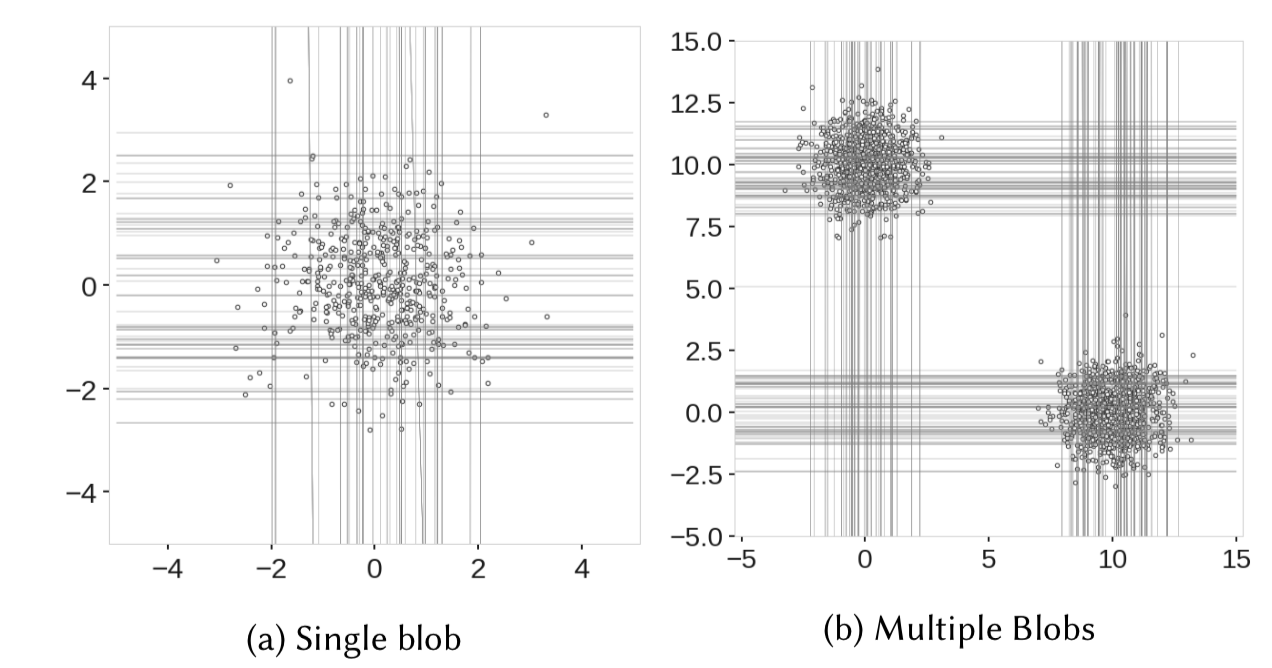

## Extended Isolation Forest

Analysis of the Isolation Forest’s drawback led to the conclusion that the problem is caused by only horizontal/vertical branch cuts. Extended Random Forest addresses that issue by approaching the problem a bit differently. Instead of selecting a random feature and then random value within the range of data it selects:
* the random slope for the branch cut
* random intercept chosen from the range of available values from the training data

These are the terms (slope/intercept) you most likely recall from the simple linear regression ($y = ax + b$). Let’s look at a visual example! From the image below we can see the main difference from the original IF algorithm -> cuts that are not parallel to the axes.

EIF Partitioning algorithm. Source: [1]
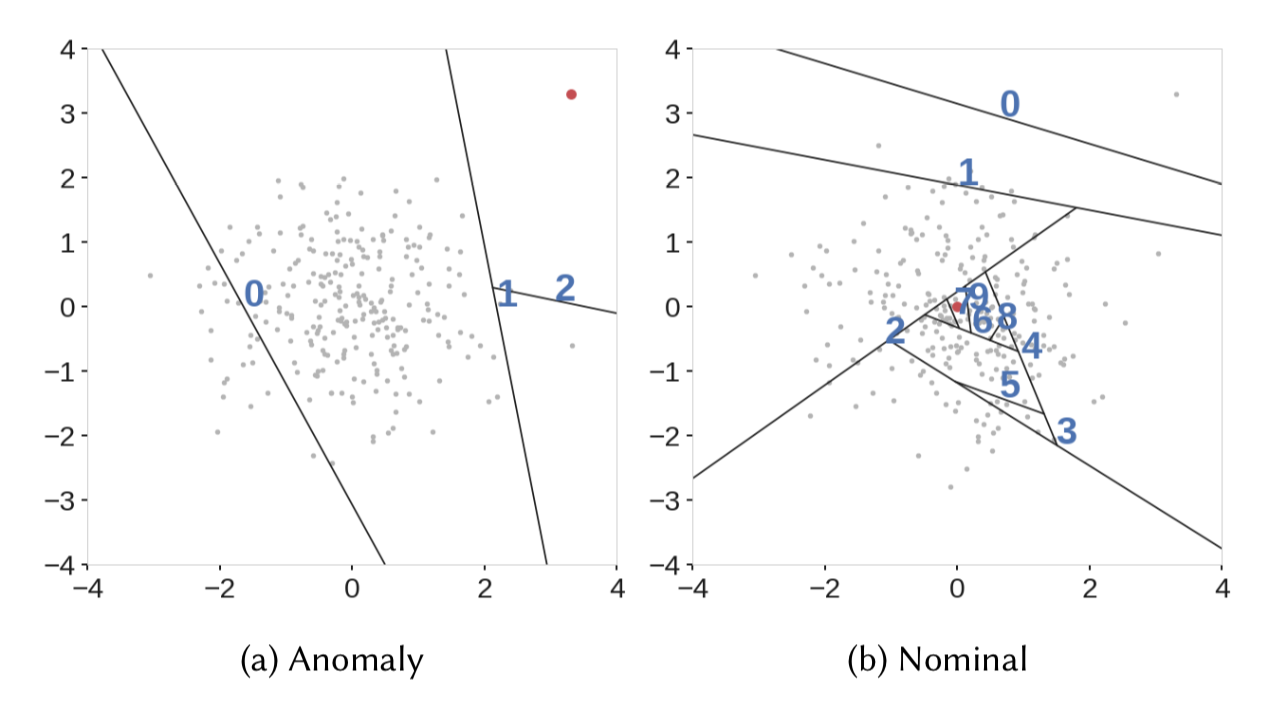

Extended Random Forest generalizes well into higher dimensions, where instead of straight lines we are dealing with hyperplanes. For a deeper dive into N-dimensional generalization, please refer to [1] for a very approachable explanation.

Let’s wrap up the theoretical explanation(结束理论解释) by looking at the difference in the anomaly score maps generated by IF/EIF. In the images below we see that the anomaly score spreads out from the data clusters radially and there are no artifacts/ghost clusters visible.

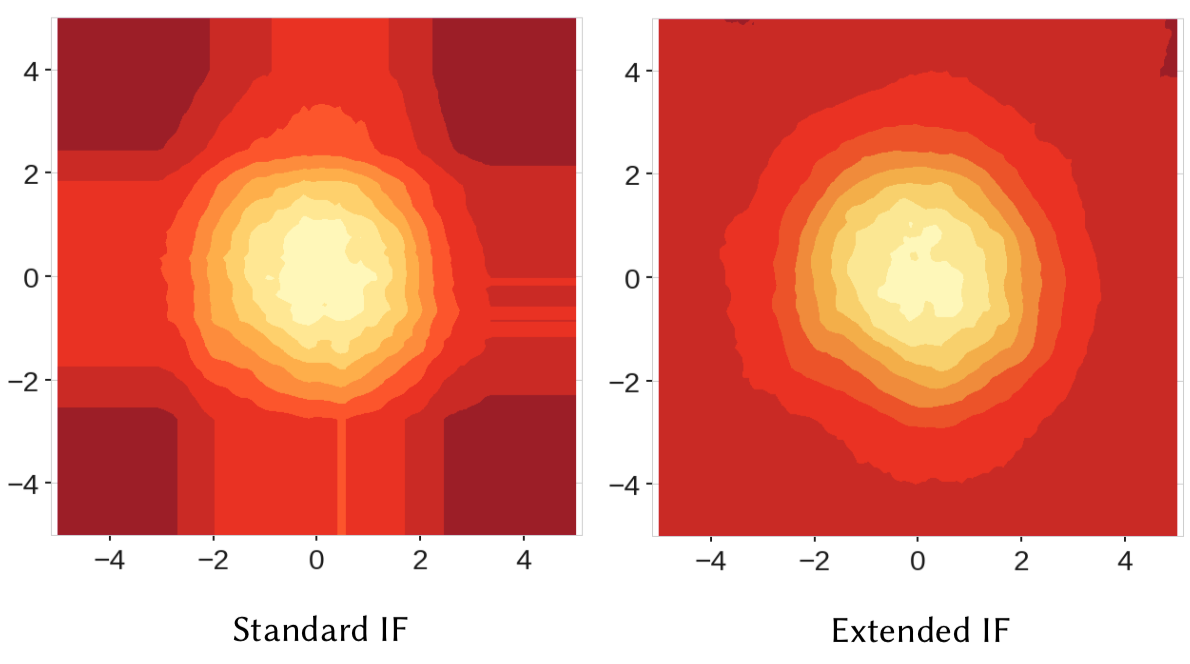

An extra feature captured by the EIF is the higher anomaly score region directly in-between the two clusters (where they kind of link). This region can be considered as close to ‘normal’ given the proximity to both clusters, but with a higher score, as it is far from the concentrated groups.

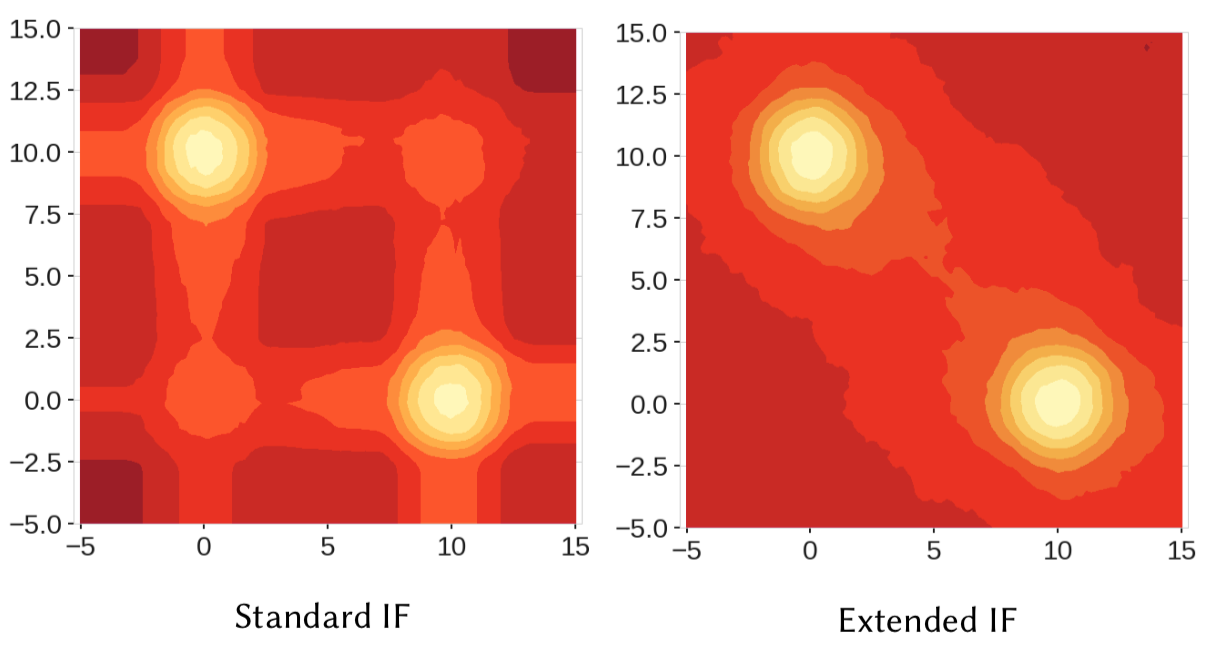

## 试验对比

In [6]:
# !pip install scipy -U

!pip freeze | grep scipy

scipy==1.3.0


In [1]:
import scipy.io
import pandas as pd
import numpy as np

In [ ]:
from sklearn.ensemble import IsolationForest

In [2]:
mat = scipy.io.loadmat('data/cover.mat')

In [3]:
mat

{'__header__': b'MATLAB 5.0 MAT-file, Platform: MACI64, Created on: Thu Aug 18 18:05:57 2016',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[2804,  139,    9, ...,  238,  135, 6121],
        [2785,  155,   18, ...,  238,  122, 6211],
        [2579,  132,    6, ...,  237,  140, 6031],
        ...,
        [2612,   17,   13, ...,  211,  138,  644],
        [2610,   16,   14, ...,  211,  138,  671],
        [2608,   23,   14, ...,  209,  131,  698]], dtype=int16),
 'y': array([[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]], dtype=uint8)}

In [4]:
X = pd.DataFrame(mat['X'])
y = pd.Series([x[0] for x in mat['y']])

### sklearn IForest

In [2]:
# define % of anomalies
anomalies_ratio = 0.009

In [14]:


if_sk = IsolationForest(n_estimators = 100, 
                        max_samples = 256,
                        contamination = anomalies_ratio, 
                        behaviour= " new", 
                        random_state = np.random.RandomState(14))

In [15]:
if_sk.fit(X)
y_pred = if_sk.predict(X)
y_pred = [1 if x == -1 else 0 for x in y_pred]

In [10]:
from sklearn.metrics import classification_report, confusion_matrix

In [18]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99    283301
           1       0.09      0.09      0.09      2747

    accuracy                           0.98    286048
   macro avg       0.54      0.54      0.54    286048
weighted avg       0.98      0.98      0.98    286048



In [20]:
confusion_matrix(y, y_pred)

array([[280962,   2339],
       [  2511,    236]])

### pyod IForest
结果和sklearn iforest的结果一样，严重怀疑就是直接用sklearn iforest实现的

In [1]:
from pyod.models.iforest import IForest
import numpy as np

In [2]:
# define % of anomalies
anomalies_ratio = 0.009

In [5]:
# train IForest detector
clf_name = 'IForest'
clf = IForest(n_estimators = 100, 
                        max_samples = 256,
                        contamination = anomalies_ratio, 
                        behaviour= " new", 
                        random_state = np.random.RandomState(14))

In [ ]:
clf.fit(X)

In [16]:
y_pred = clf.predict(X)

In [17]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99    283301
           1       0.09      0.09      0.09      2747

    accuracy                           0.98    286048
   macro avg       0.54      0.54      0.54    286048
weighted avg       0.98      0.98      0.98    286048



In [18]:
confusion_matrix(y, y_pred)

array([[280962,   2339],
       [  2511,    236]])

### EIF实现
https://github.com/sahandha/eif  到现在接近1年没有更新了。。。好像是放弃了。。。

In [27]:
#!pip install eif
import eif as iso

In [28]:
if_eif = iso.iForest(X.values, 
                     ntrees = 100, 
                     sample_size = 256, 
                     ExtensionLevel = 0)

# calculate anomaly scores
anomaly_scores = if_eif.compute_paths(X_in = X.values)
# sort the scores
anomaly_scores_sorted = np.argsort(anomaly_scores)
# retrieve indices of anomalous observations
indices_with_preds = anomaly_scores_sorted[-int(np.ceil(anomalies_ratio * X.shape[0])):]
# create predictions 
y_pred = np.zeros_like(y)
y_pred[indices_with_preds] = 1

In [29]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99    283301
           1       0.06      0.06      0.06      2747

    accuracy                           0.98    286048
   macro avg       0.53      0.53      0.53    286048
weighted avg       0.98      0.98      0.98    286048



### 结论

模型运行时间长，20min+；  
结果变差。。。

In [ ]:
from nbdev.export import notebook2script
notebook2script('.ipynb')